In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
from os import listdir

from trainTestValSplit import getTrainTestValSplit
from definitions import ROOT_DIR
from preProcessing import preProcess
from definitions import main_activity_label_classes

In [14]:
# Plotting the number of observations in the raw dataset, with the NA values and what users have the most NA values
files = listdir('dataset/ExtraSensory/ExtraSensory.per_uuid_features_labels/')

combined = []
na_per_user = {}

for file in files:
    user = pd.read_csv('dataset/ExtraSensory/ExtraSensory.per_uuid_features_labels/' + file)
    prop_na = user.isnull().sum().sum() / (user.shape[0] * user.shape[1])
    na_per_user[file] = prop_na

    combined.append(user)

combined= pd.concat(combined, axis=0, ignore_index=True)

num_features = len([col for col in user.columns if 'label:' in col])
total_values = combined.shape[0] * combined.shape[1]

print(f"There are {combined.shape[0]} observations")
print(f"There are {len(combined.columns) - num_features} features")
print(f"There are {num_features} labels")
print(f"{(sum(combined.isna().sum()) / total_values):.4f} is a NA value")

del user, prop_na

There are 377346 observations
There are 228 features
There are 51 labels
0.2320 is a NA value


In [25]:
# Describe the distribution of na values per user
na_per_user_df = pd.DataFrame(na_per_user.values(), na_per_user.keys())
na_per_user_df.describe()

,0
count,60.000000
mean,0.237148
std,0.081703
min,0.098709
25%,0.184313
50%,0.220242
75%,0.282095
max,0.467861


In [32]:
# Which users have the most NA values
na_per_user_df > 0.282095

,0
00EABED2-271D-49D8-B599-1D4A09240601.features_labels.csv,True
098A72A5-E3E5-4F54-A152-BBDA0DF7B694.features_labels.csv,False
0A986513-7828-4D53-AA1F-E02D6DF9561B.features_labels.csv,False
0BFC35E2-4817-4865-BFA7-764742302A2D.features_labels.csv,False
0E6184E1-90C0-48EE-B25A-F1ECB7B9714E.features_labels.csv,False
1155FF54-63D3-4AB2-9863-8385D0BD0A13.features_labels.csv,False
11B5EC4D-4133-4289-B475-4E737182A406.features_labels.csv,False
136562B6-95B2-483D-88DC-065F28409FD2.features_labels.csv,False
1538C99F-BA1E-4EFB-A949-6C7C47701B20.features_labels.csv,True
1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842.features_labels.csv,False


In [2]:
train, test, val = getTrainTestValSplit(_dataset_path=f'{ROOT_DIR}/dataset/ExtraSensory/Processed')

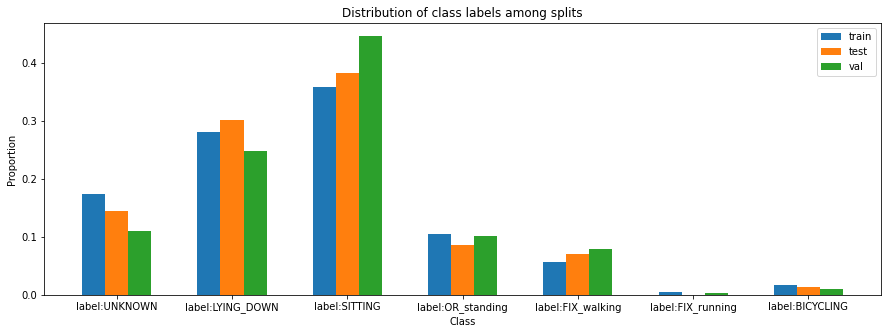

In [11]:
# What is the label distribution?
train_x, train_y = preProcess(train)
test_x, test_y = preProcess(test)
val_x, val_y = preProcess(val)
#del train_x, test_x, val_x

train_y = train_y.value_counts(normalize=True).sort_index()
test_y  = test_y.value_counts(normalize=True).sort_index()
val_y =  val_y.value_counts(normalize=True).sort_index()

X = main_activity_label_classes.keys()
X_axis = np.arange(len(X))

plt.figure(figsize=(15,5))
plt.bar(X_axis-0.2, train_y, width=0.2, label= 'train')
plt.bar(X_axis, test_y, width=0.2, label= 'test')
plt.bar(X_axis+0.2, val_y, width=0.2, label= 'val')
plt.xticks(X_axis, X)
plt.legend()
plt.ylabel('Proportion')
plt.xlabel('Class')
plt.title('Distribution of class labels among splits')
plt.show()

In [12]:
# We have to check for outliers
combined = pd.concat([train_x, test_x, val_x])

In [42]:
lof = LocalOutlierFactor(n_neighbors=20)
y_pred = lof.fit_predict(np.array(combined['raw_acc:3d:mean_x']).reshape(-1, 1))

In [44]:
np.unique(y_pred, return_counts=True)

array([   433, 308221], dtype=int64)